In [1]:
!pip install -q yfinance

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['PLTR', 'NVDA', 'AMD', 'ADBE']

# Set up End and Start times for data grab
tech_list = ['PLTR', 'NVDA', 'AMD', 'ADBE']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [PLTR, NVDA, AMD, ADBE]
company_name = ["Palentir", "Nvidia", "AMD", "Adobe"]

for c, c_name in zip(company_list, company_name):
    c["company_name"] = c_name
    
df = pd.concat(company_list, axis=0)
df.head(10)
#df.tail(10)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-06-13,7.990,8.000,7.500,7.64,7.64,40943000,Palentir
2022-06-14,7.735,7.980,7.585,7.82,7.82,30564100,Palentir
2022-06-15,7.920,8.300,7.815,8.12,8.12,38235300,Palentir
2022-06-16,7.840,7.985,7.580,7.67,7.67,36793500,Palentir
2022-06-17,7.700,8.330,7.690,8.24,8.24,45518000,Palentir
2022-06-21,8.590,9.050,8.560,8.71,8.71,48887600,Palentir
2022-06-22,8.520,9.285,8.450,9.01,9.01,43430600,Palentir
2022-06-23,9.020,9.500,8.840,9.46,9.46,44618000,Palentir
2022-06-24,9.530,10.200,9.480,10.19,10.19,67826000,Palentir


In [3]:
# Summary Stats
PLTR.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,8.517180,8.778448,8.310740,8.549280,8.549280,4.402611e+07
std,1.696483,1.835258,1.643928,1.741458,1.741458,3.346546e+07
min,5.980000,6.170000,5.920000,6.000000,6.000000,1.082440e+07
25%,7.611250,7.820000,7.392500,7.552500,7.552500,2.795015e+07
50%,8.130000,8.305000,7.940000,8.100000,8.100000,3.351765e+07
75%,9.087500,9.351250,8.825000,9.130000,9.130000,4.318242e+07
max,16.010000,17.160000,14.920000,15.460000,15.460000,2.272441e+08


In [4]:
# General info
PLTR.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-06-13 to 2023-06-09
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


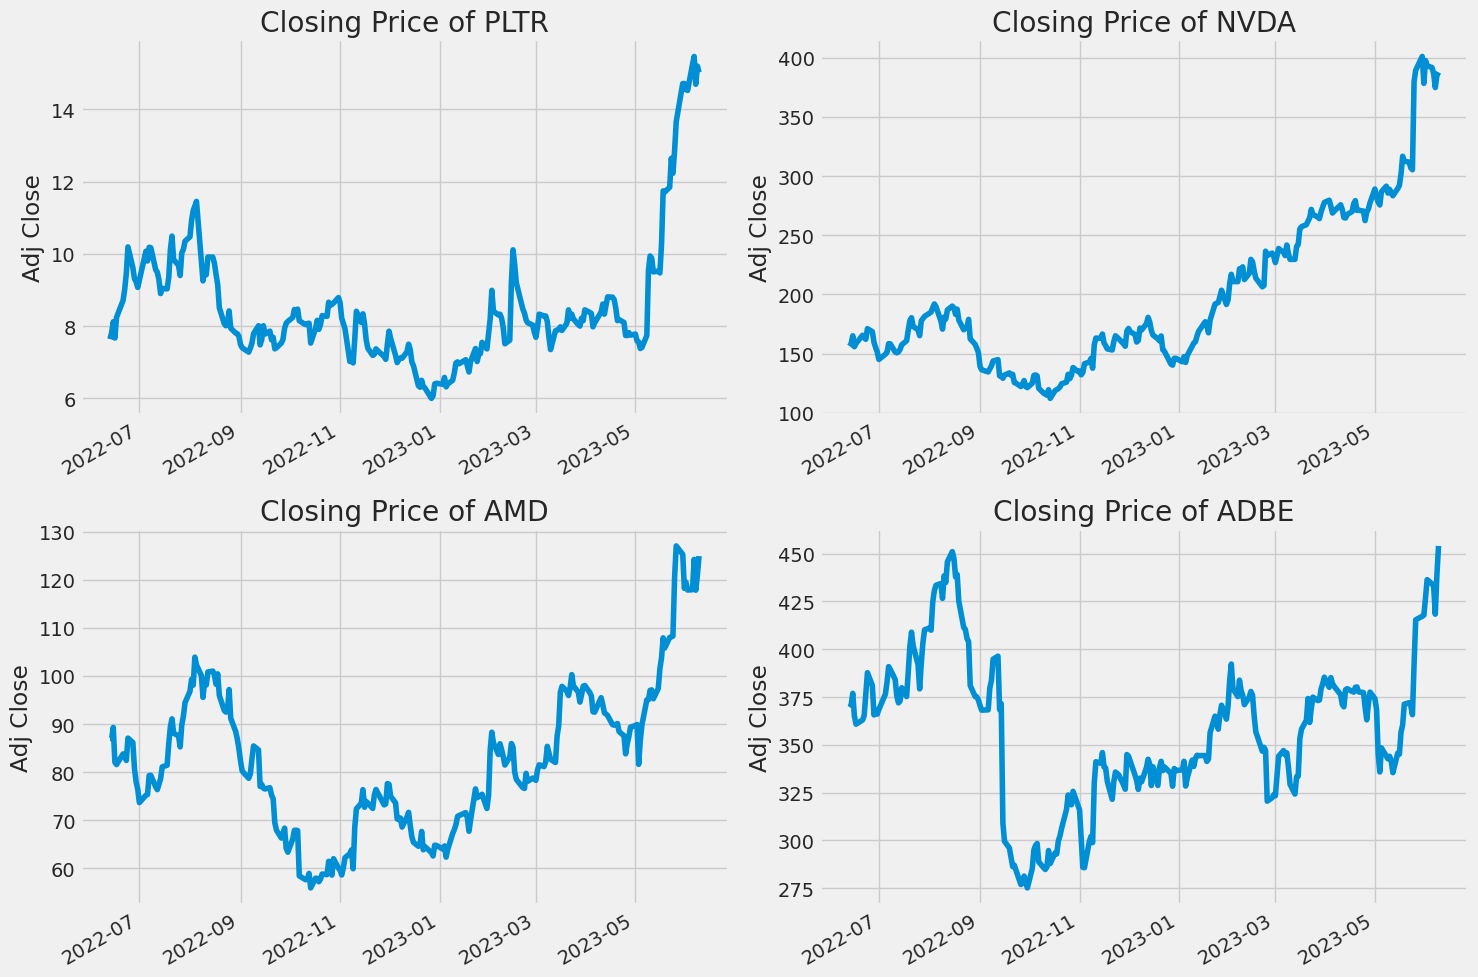

In [5]:
#historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

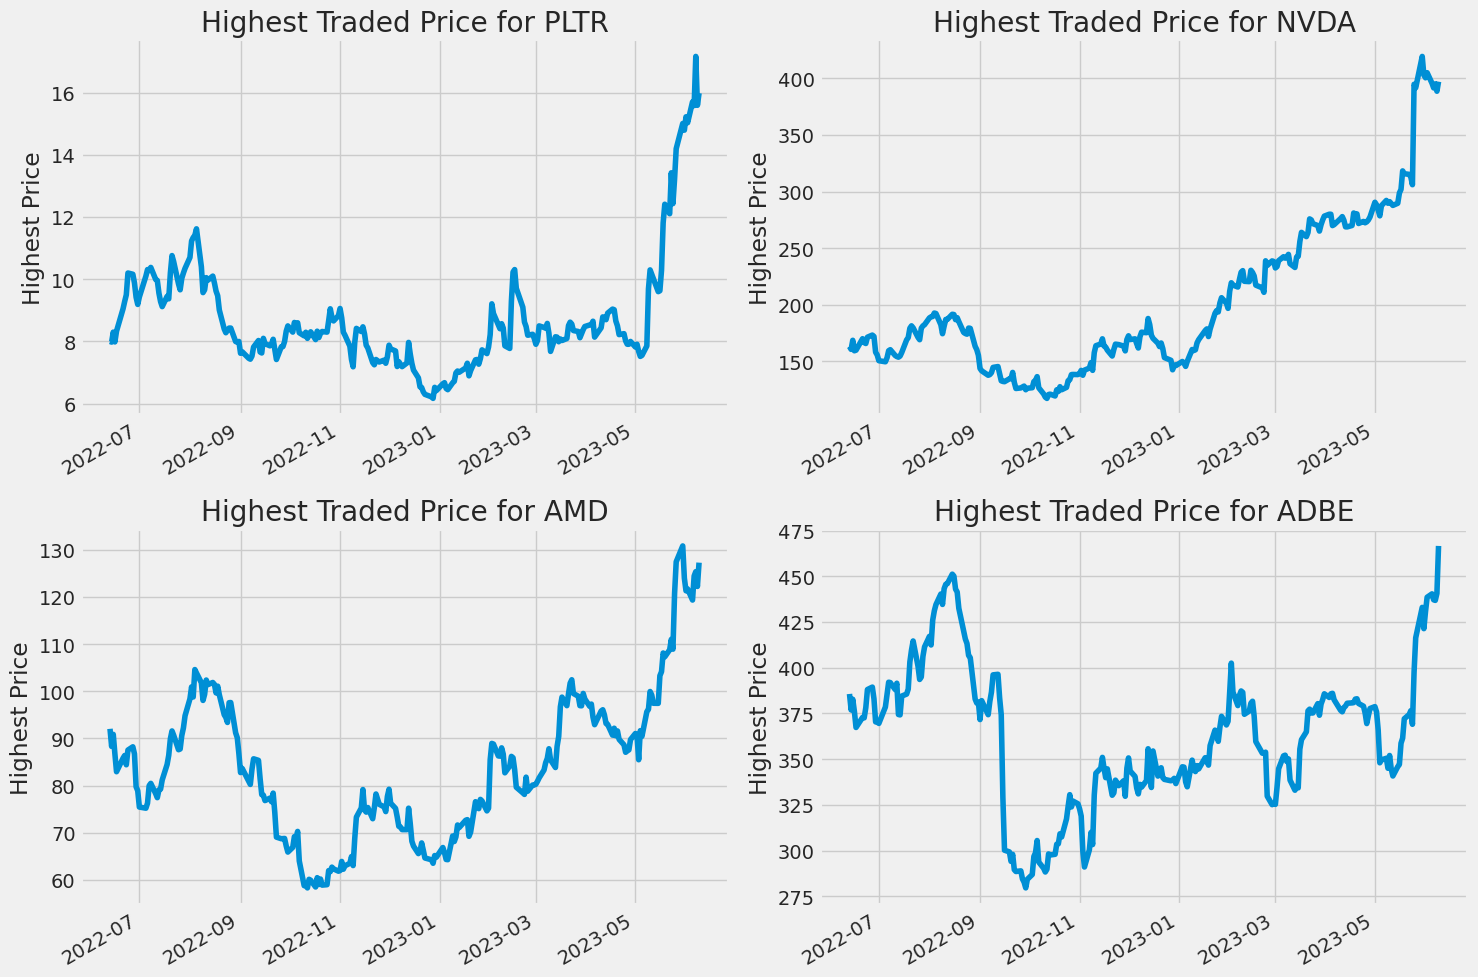

In [6]:
#Highest Price Traded
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['High'].plot()
    plt.ylabel('Highest Price')
    plt.xlabel(None)
    plt.title(f"Highest Traded Price for {tech_list[i - 1]}")
    
plt.tight_layout()

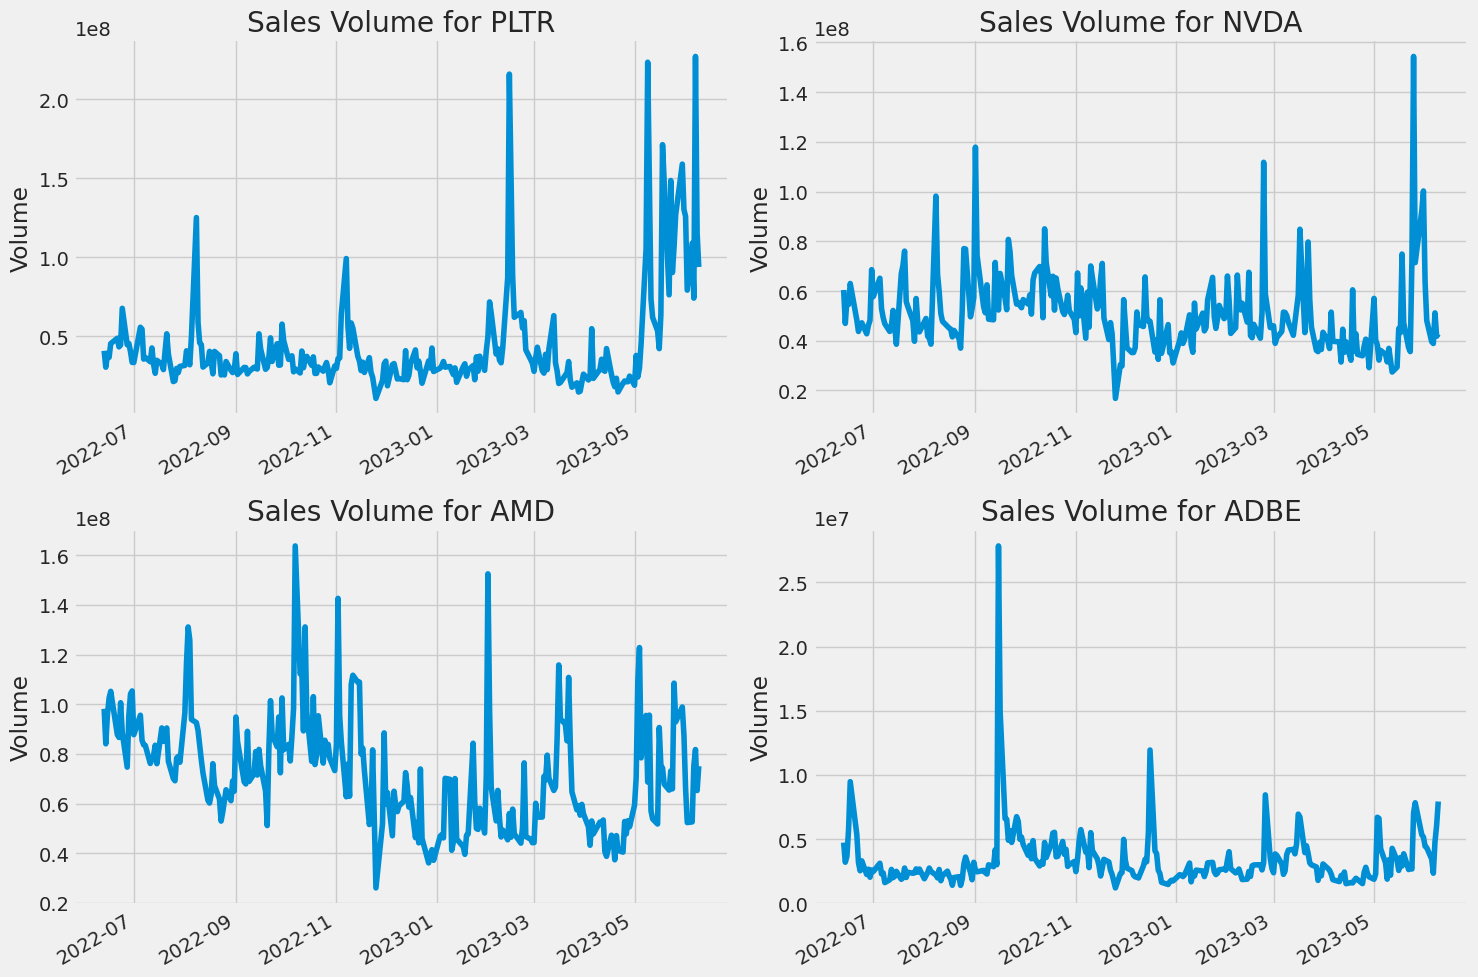

In [7]:
#Volume Traded
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

# 2. What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

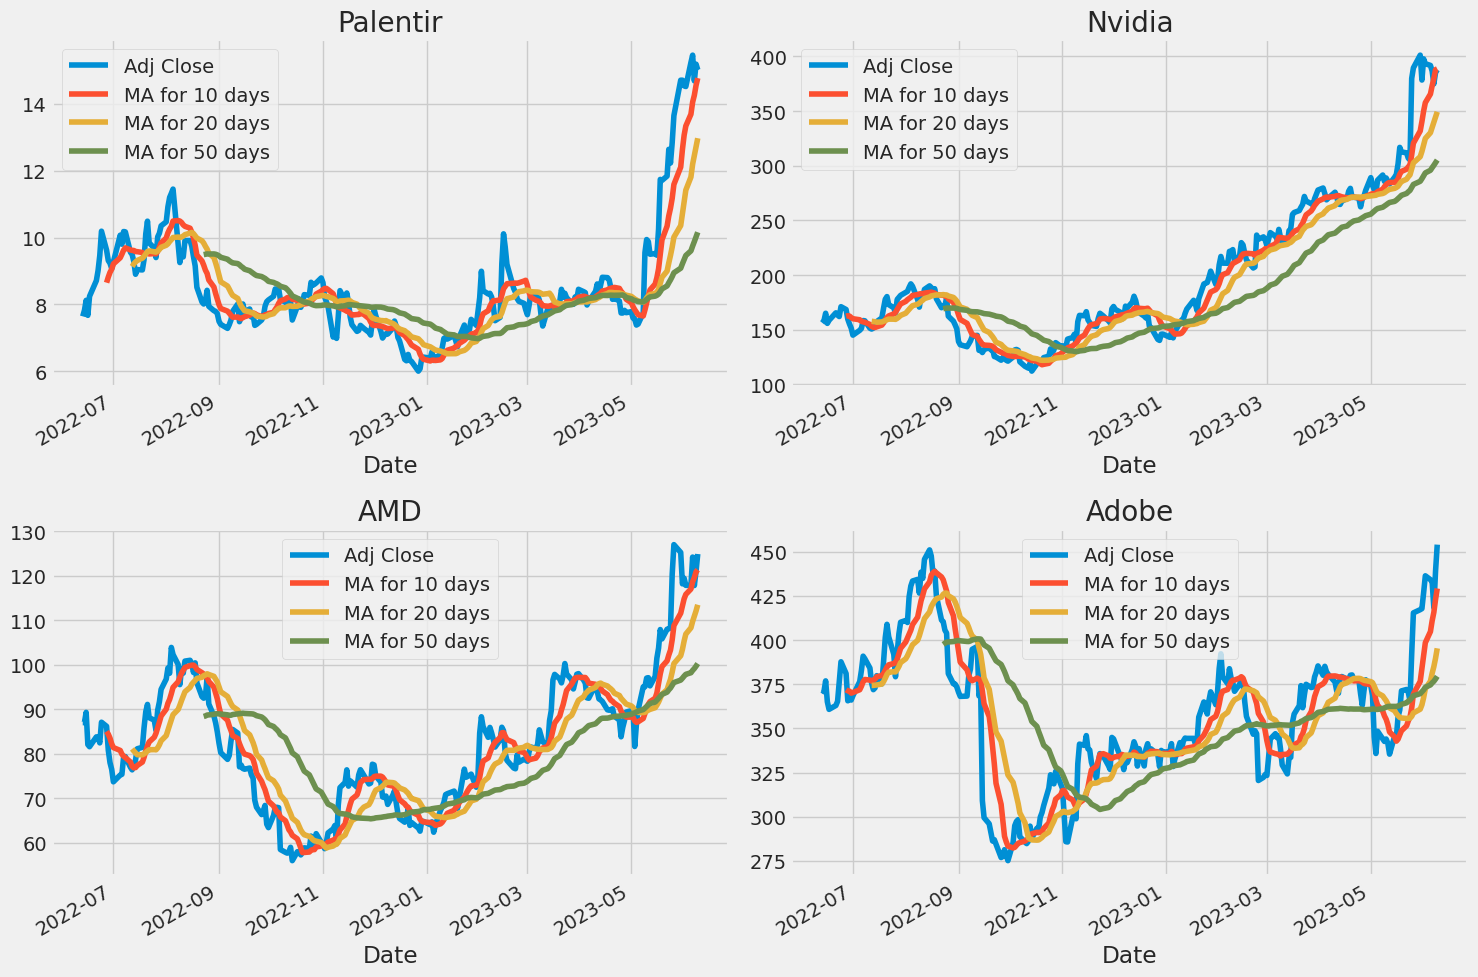

In [8]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

PLTR[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Palentir')

NVDA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Nvidia')

AMD[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('AMD')

ADBE[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Adobe')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

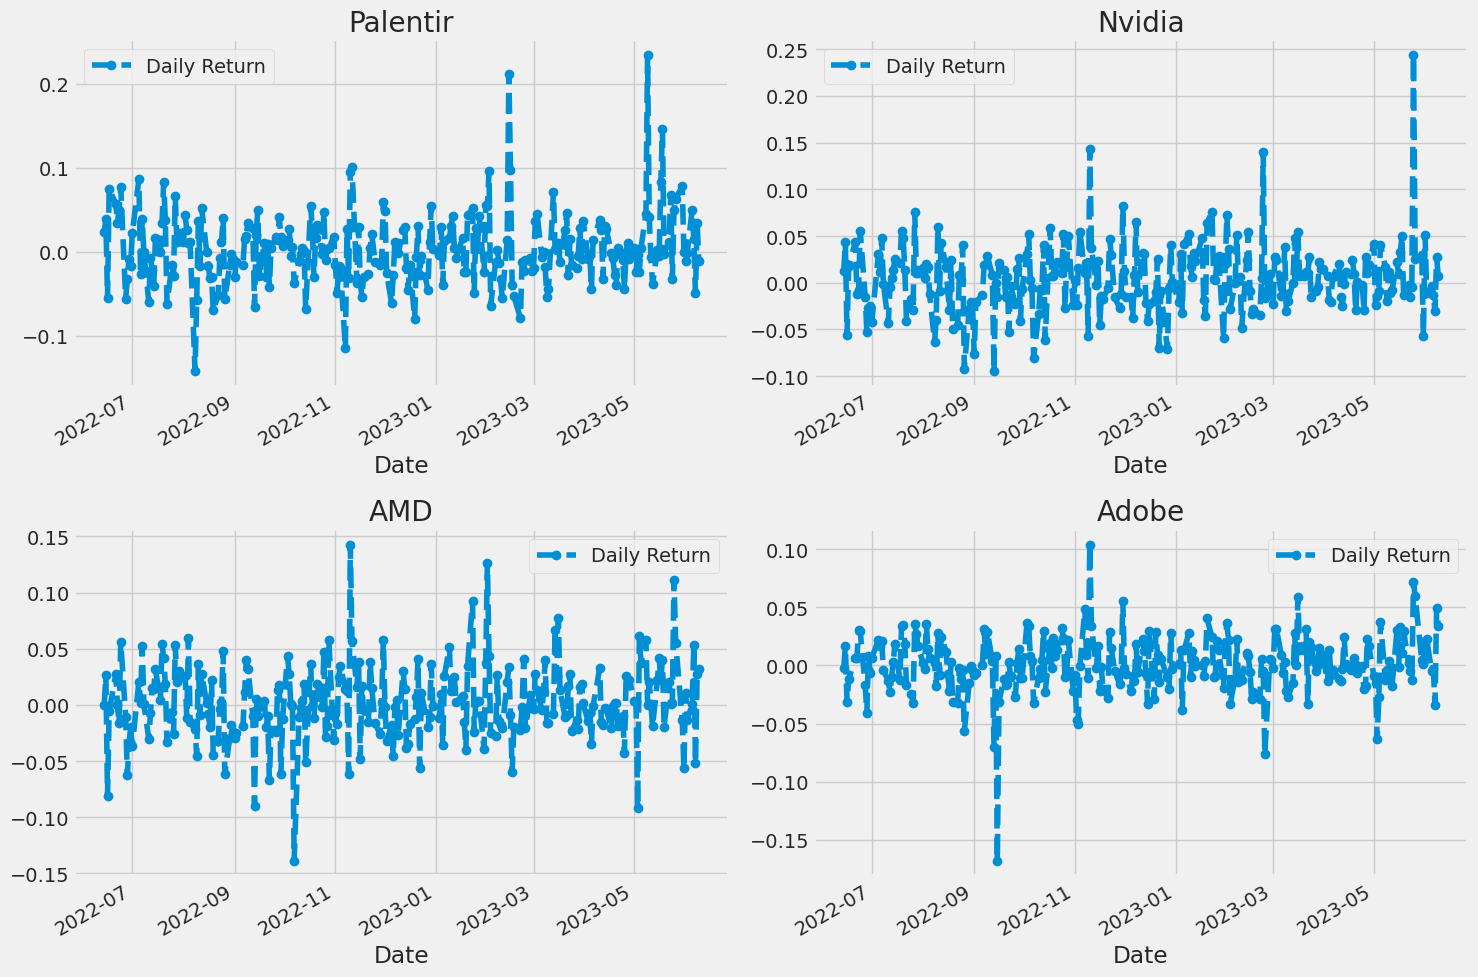

In [9]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

PLTR['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Palentir')

NVDA['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Nvidia')

AMD['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('AMD')

ADBE['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Adobe')

fig.tight_layout()

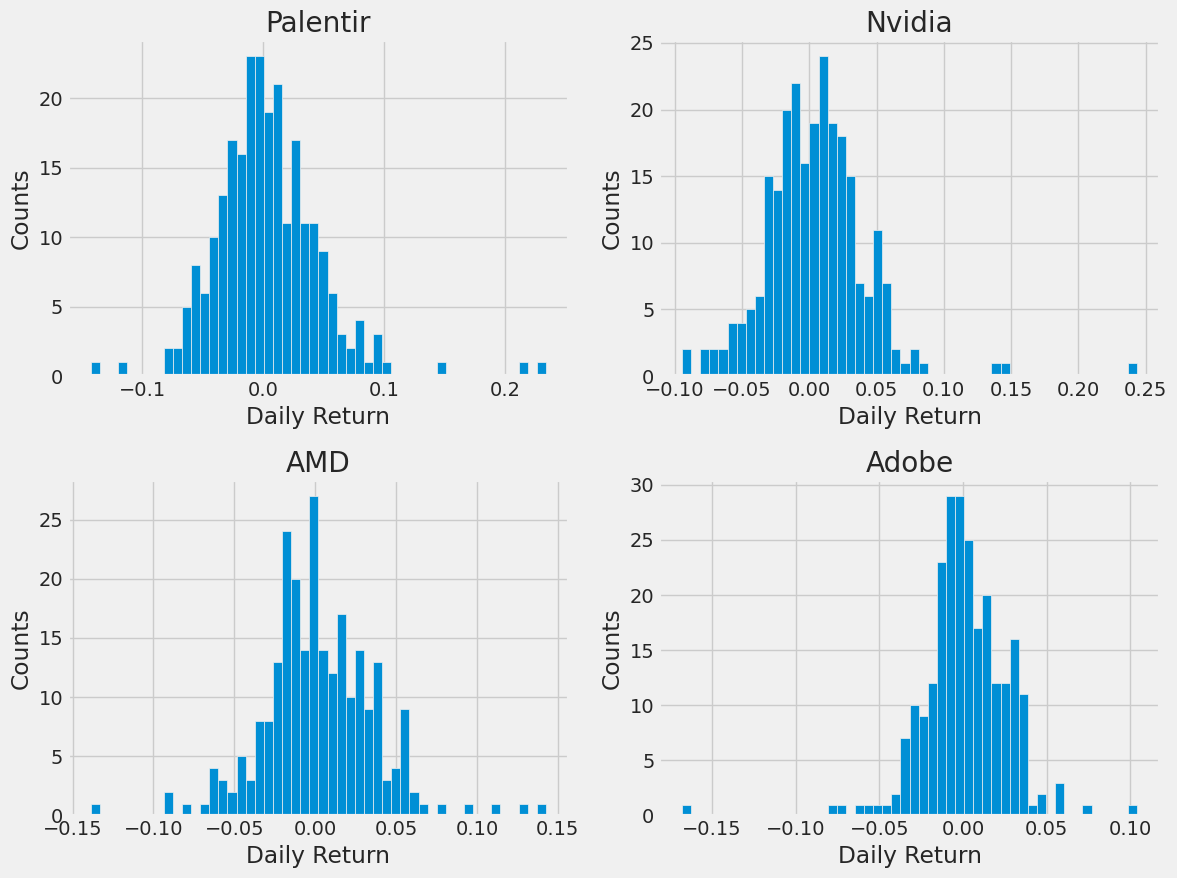

In [10]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [11]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,ADBE,AMD,NVDA,PLTR
Date,,,,
2022-06-13,NaN,NaN,NaN,NaN
2022-06-14,-0.002233,0.000000,0.012079,0.023560
2022-06-15,0.016450,0.026555,0.043635,0.038363
2022-06-16,-0.031413,-0.081187,-0.056030,-0.055419
2022-06-17,-0.011751,-0.005850,0.017884,0.074315


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

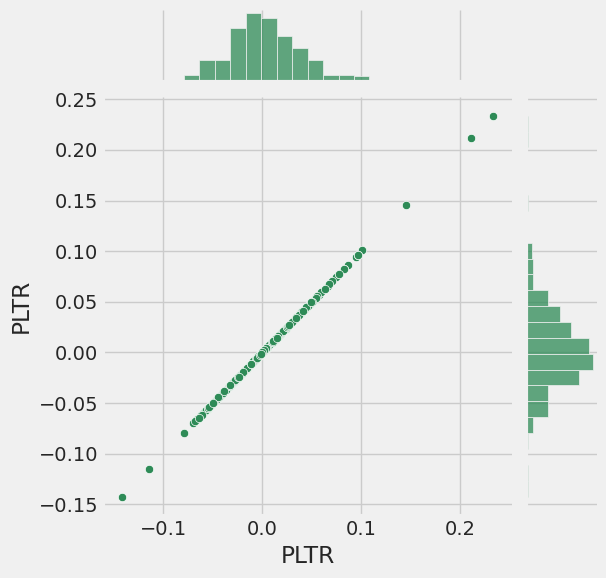

In [12]:
# Comparing PLTR to itself should show a perfectly linear relationship
sns.jointplot(x='PLTR', y='PLTR', data=tech_rets, kind='scatter', color='seagreen')

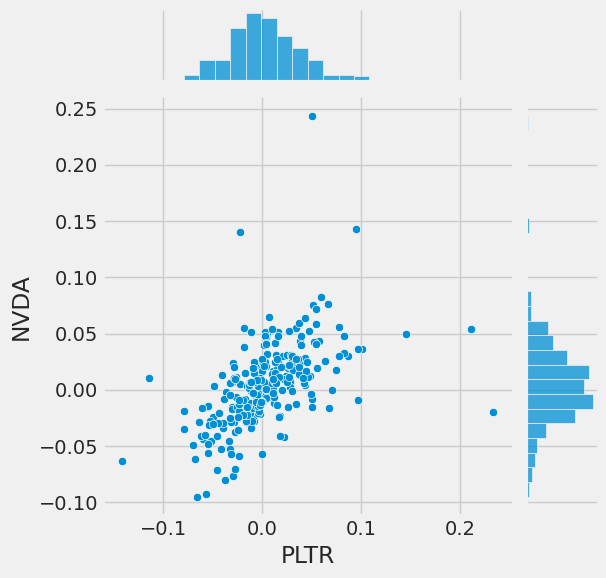

In [13]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='PLTR', y='NVDA', data=tech_rets, kind='scatter')

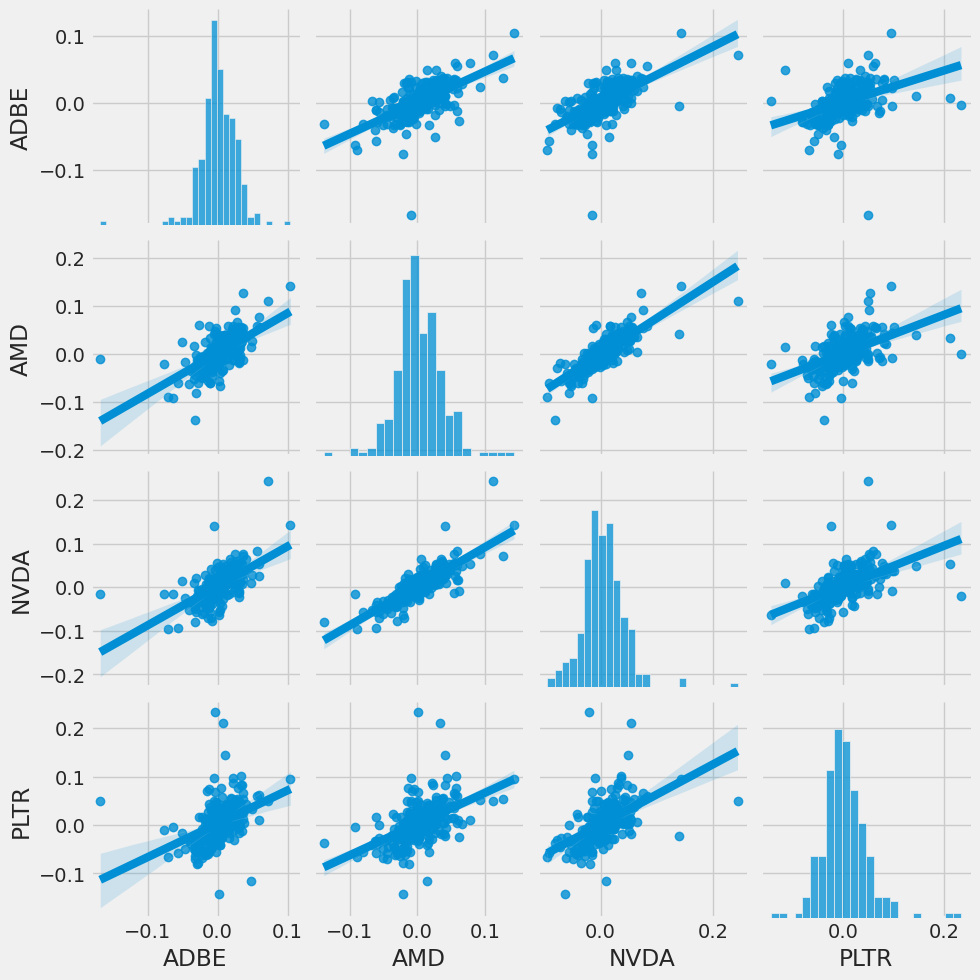

In [14]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

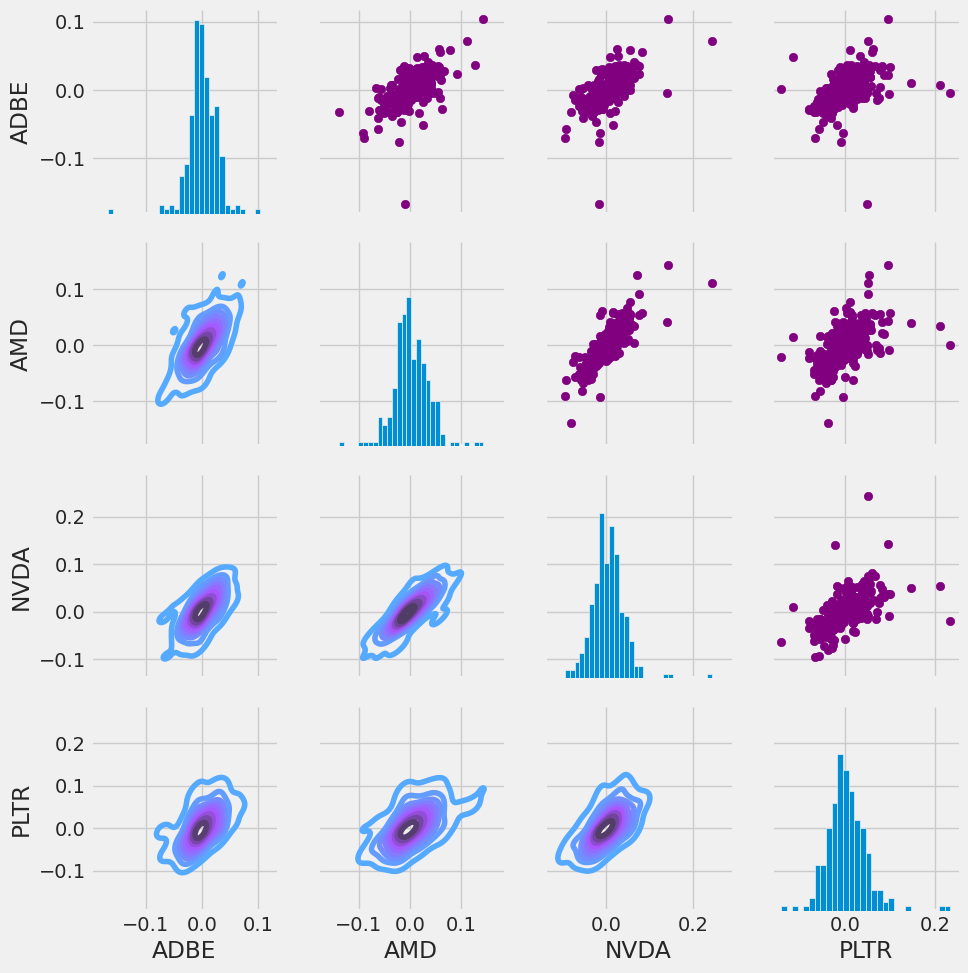

In [15]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

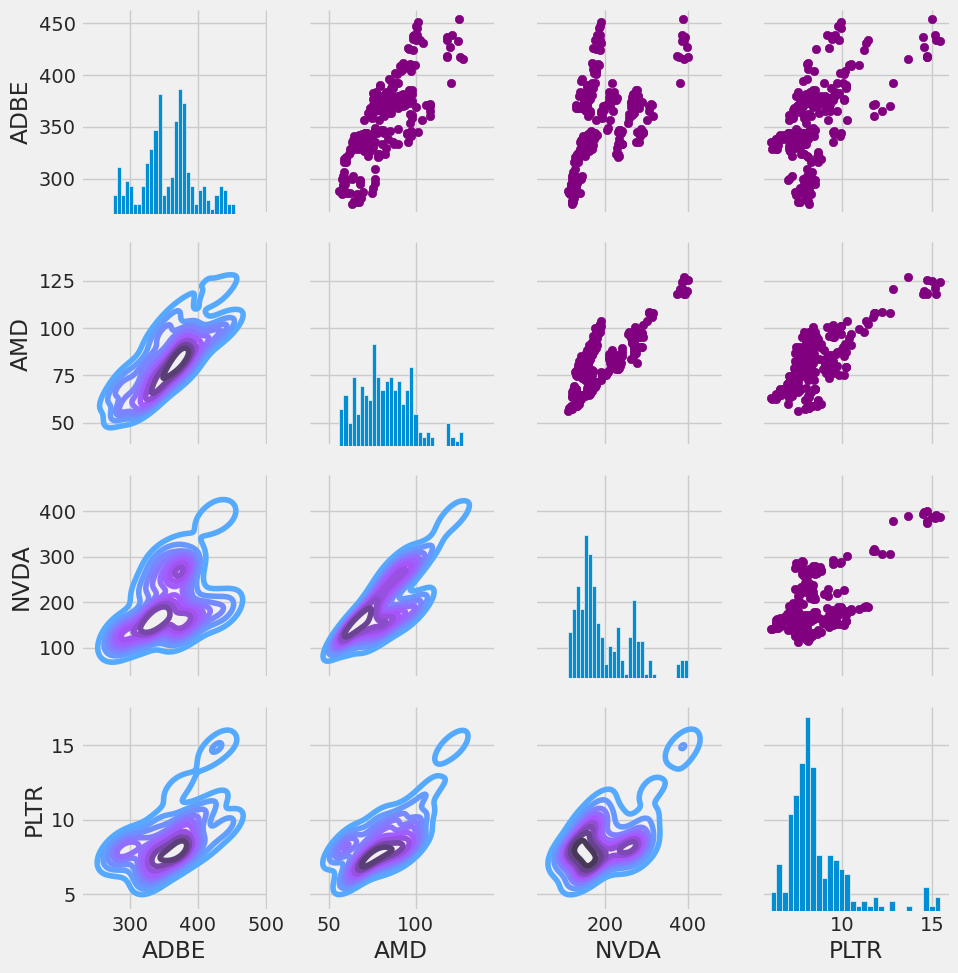

In [16]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

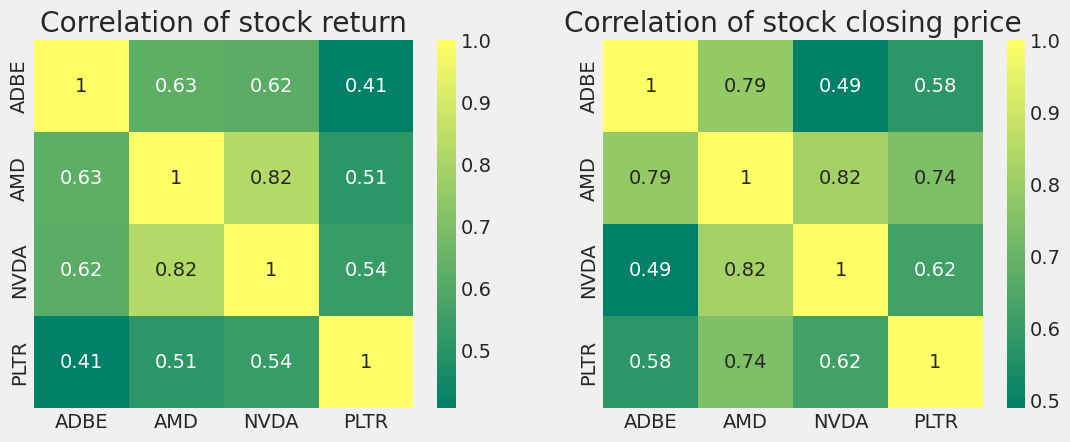

In [17]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

# 5. How much value do we put at risk by investing in a particular stock?

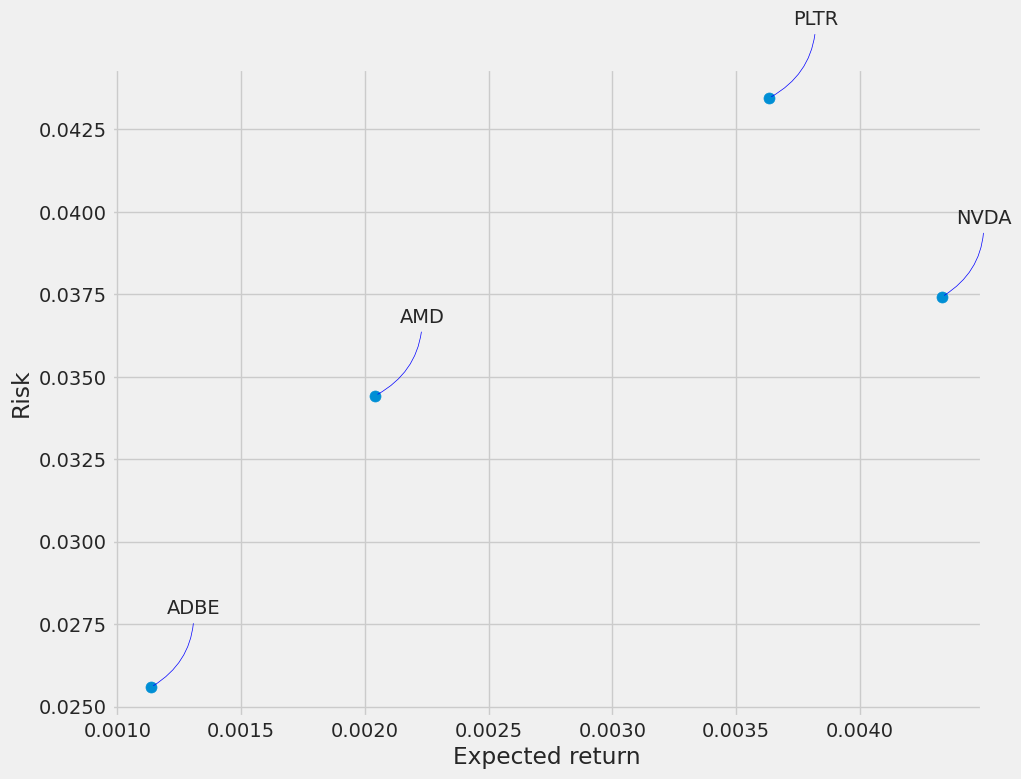

In [18]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of APPLE inc:

In [19]:
# Get the stock quote
df = pdr.get_data_yahoo('PLTR', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-30,10.000,11.41,9.110,9.50,9.50,338584400
2020-10-01,9.690,10.10,9.230,9.46,9.46,124297600
2020-10-02,9.060,9.28,8.940,9.20,9.20,55018300
2020-10-05,9.430,9.49,8.920,9.03,9.03,36316900
2020-10-06,9.040,10.18,8.900,9.90,9.90,90864000
...,...,...,...,...,...,...
2023-06-05,14.365,15.70,14.365,15.24,15.24,109017800
2023-06-06,15.300,15.58,14.920,15.46,15.46,74284300
2023-06-07,16.010,17.16,14.520,14.69,14.69,227244100


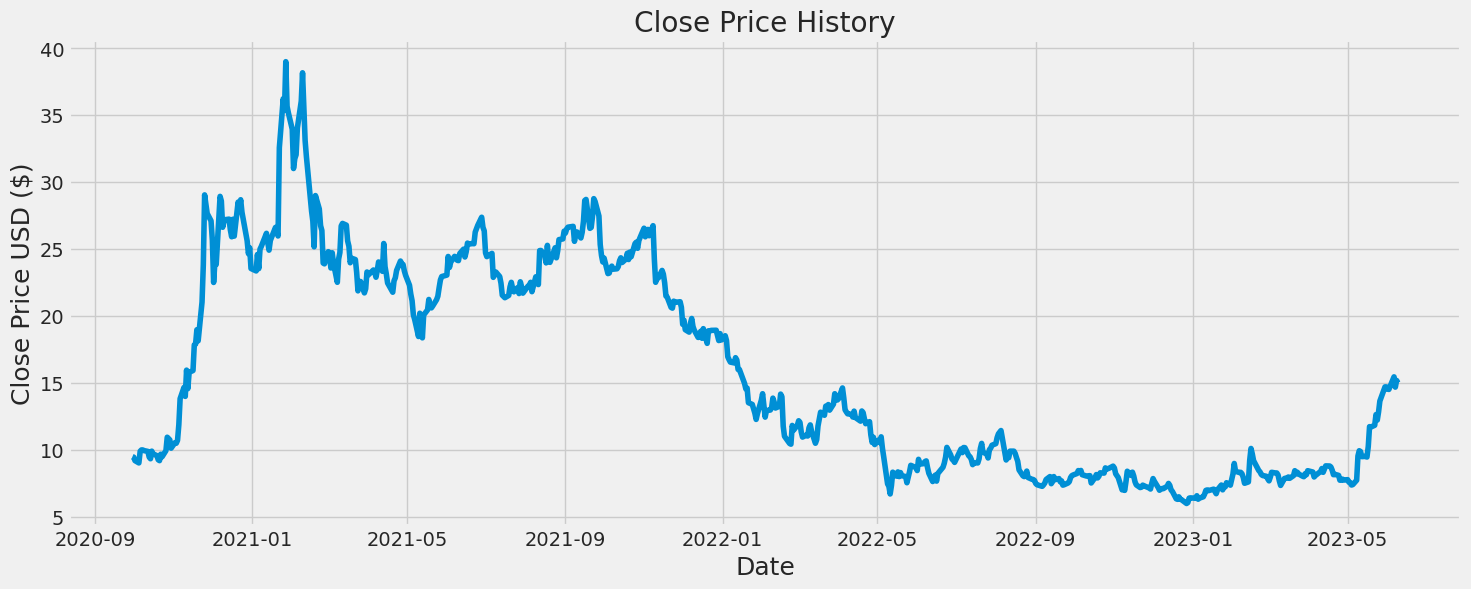

In [20]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [21]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

645

In [22]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.10606061],
       [0.10484849],
       [0.09696969],
       [0.09181817],
       [0.11818181],
       [0.12121212],
       [0.12121212],
       [0.11969696],
       [0.1178788 ],
       [0.10515152],
       [0.10121213],
       [0.11848484],
       [0.11242424],
       [0.10818181],
       [0.09909092],
       [0.09696969],
       [0.11151516],
       [0.10575757],
       [0.11969696],
       [0.14999999],
       [0.14696971],
       [0.14393939],
       [0.12515152],
       [0.13757576],
       [0.13636364],
       [0.14303031],
       [0.17818182],
       [0.23727272],
       [0.26272728],
       [0.24242424],
       [0.30181818],
       [0.26      ],
       [0.2969697 ],
       [0.3009091 ],
       [0.35909092],
       [0.36060605],
       [0.39333332],
       [0.36818181],
       [0.4557576 ],
       [0.53999999],
       [0.69848483],
       [0.65636363],
       [0.63969699],
       [0.59606061],
       [0.50030304],
       [0.54636366],
       [0.5409091 ],
       [0.695

In [23]:
#Create windowed_dataset
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Data.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [24]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.10606061, 0.10484849, 0.09696969, 0.09181817, 0.11818181,
       0.12121212, 0.12121212, 0.11969696, 0.1178788 , 0.10515152,
       0.10121213, 0.11848484, 0.11242424, 0.10818181, 0.09909092,
       0.09696969, 0.11151516, 0.10575757, 0.11969696, 0.14999999,
       0.14696971, 0.14393939, 0.12515152, 0.13757576, 0.13636364,
       0.14303031, 0.17818182, 0.23727272, 0.26272728, 0.24242424,
       0.30181818, 0.26      , 0.2969697 , 0.3009091 , 0.35909092,
       0.36060605, 0.39333332, 0.36818181, 0.4557576 , 0.53999999,
       0.69848483, 0.65636363, 0.63969699, 0.59606061, 0.50030304,
       0.54636366, 0.5409091 , 0.69515153, 0.68454546, 0.62515149,
       0.63757579, 0.64242427, 0.64363636, 0.61909092, 0.60363637,
       0.64333332, 0.60515149, 0.68212122, 0.66787882, 0.68757577])]
[0.6590909090909092]

[array([0.10606061, 0.10484849, 0.09696969, 0.09181817, 0.11818181,
       0.12121212, 0.12121212, 0.11969696, 0.1178788 , 0.10515152,
       0.10121213, 0.11848484, 0.112

In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D
from keras.callbacks import LearningRateScheduler
from keras.optimizers import SGD
from keras.losses import Huber

# Conv1D - 2xLSTM model
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=6, strides=1, padding='causal', activation='relu', input_shape= (x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences=True,))
model.add(LSTM(64))
model.add(Dense(25))
model.add(Dense(1))

lr_scheduler = LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
optimizer = SGD(learning_rate=1e-4, momentum=0.9)
model.compile(loss=Huber(), optimizer = optimizer, metrics=['mae'])
history = model.fit(x_train, y_train, epochs=100,callbacks=[lr_scheduler])

# Compile the model
#model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
#model.fit(x_train, y_train, batch_size=1, epochs=1)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Epoch 1/100
19/19 [==============================] - 7s 109ms/step - loss: 0.0655 - mae: 0.2788 - lr: 1.0000e-04
Epoch 2/100
19/19 [==============================] - 2s 113ms/step - loss: 0.0534 - mae: 0.2402 - lr: 1.1220e-04
Epoch 3/100
19/19 [==============================] - 2s 111ms/step - loss: 0.0417 - mae: 0.2117 - lr: 1.2589e-04
Epoch 4/100
19/19 [==============================] - 2s 128ms/step - loss: 0.0330 - mae: 0.1966 - lr: 1.4125e-04
Epoch 5/100
19/19 [==============================] - 2s 109ms/step - loss: 0.0270 - mae: 0.1863 - lr: 1.5849e-04
Epoch 6/100
19/19 [==============================] - 2s 110ms/step - loss: 0.0231 - mae: 0.1810 - lr: 1.7783e-04
Epoch 7/100
19/19 [==============================] - 2s 109ms/step - loss: 0.0204 - mae: 0.1765 - lr: 1.9953e-04
Epoch 8/100
19/19 [==============================] - 2s 111ms/step - loss: 0.0188 - mae: 0.1733 - lr: 2.2387e-04
Epoch 9/100
19/19 [==============================] - 2s 110ms/step - loss: 0.0176 - mae: 0.1693 

Text(0, 0.5, 'loss')

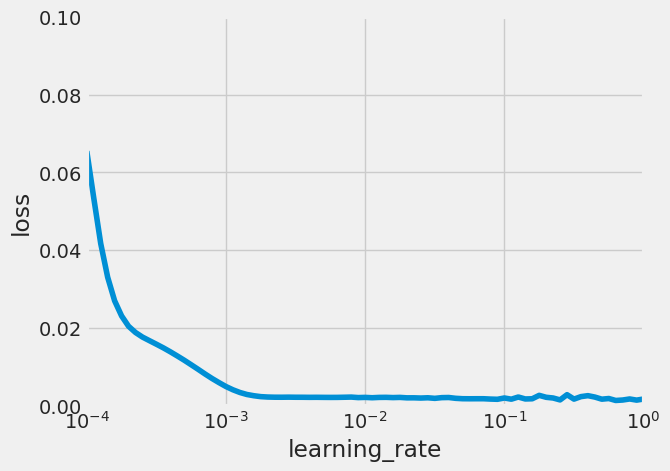

In [26]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-4, 1, 0, 0.1])
plt.xlabel('learning_rate')
plt.ylabel('loss')

#optimal lr = 1e-2

In [27]:
#final model
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=6, strides=1, padding='causal', activation='relu', input_shape= (x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences=True,))
model.add(LSTM(64))
model.add(Dense(25))
model.add(Dense(1))

optimizer = SGD(learning_rate=1e-2, momentum = 0.9)
model.compile(loss=Huber(), optimizer=optimizer, metrics = ['mae'])
history = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
19/19 [==============================] - 6s 109ms/step - loss: 0.0257 - mae: 0.1786
Epoch 2/100
19/19 [==============================] - 2s 111ms/step - loss: 0.0042 - mae: 0.0713
Epoch 3/100
19/19 [==============================] - 2s 107ms/step - loss: 0.0024 - mae: 0.0503
Epoch 4/100
19/19 [==============================] - 2s 109ms/step - loss: 0.0021 - mae: 0.0469
Epoch 5/100
19/19 [==============================] - 2s 108ms/step - loss: 0.0020 - mae: 0.0435
Epoch 6/100
19/19 [==============================] - 2s 108ms/step - loss: 0.0020 - mae: 0.0430
Epoch 7/100
19/19 [==============================] - 2s 112ms/step - loss: 0.0020 - mae: 0.0431
Epoch 8/100
19/19 [==============================] - 2s 109ms/step - loss: 0.0019 - mae: 0.0428
Epoch 9/100
19/19 [==============================] - 2s 110ms/step - loss: 0.0019 - mae: 0.0426
Epoch 10/100
19/19 [==============================] - 2s 108ms/step - loss: 0.0019 - mae: 0.0438
Epoch 11/100
19/19 [===================

In [28]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 14ms/step


1.8385105625174938

/tmp/ipykernel_20/2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


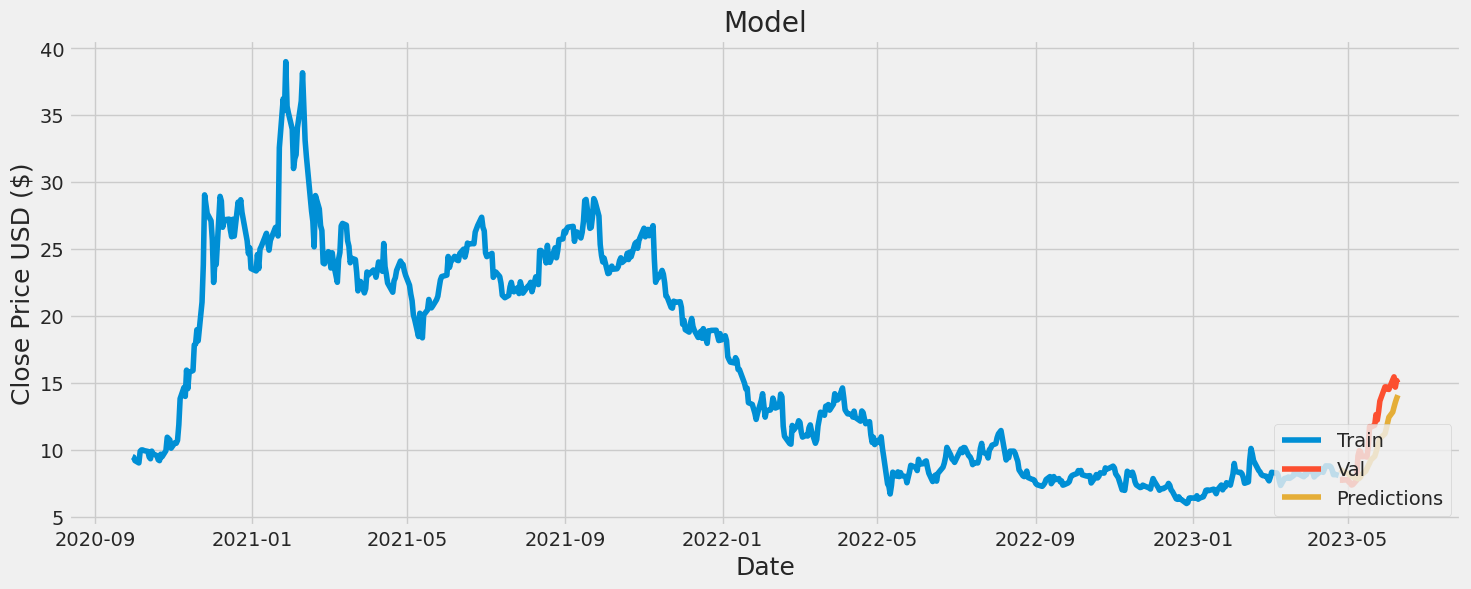

In [29]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [30]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-04-25,7.74,8.544926
2023-04-26,7.74,8.487407
2023-04-27,7.82,8.411330
2023-04-28,7.75,8.330506
2023-05-01,7.78,8.249063
2023-05-02,7.59,8.173492
2023-05-03,7.56,8.102671
2023-05-04,7.38,8.036197
2023-05-05,7.41,7.967946
